In [1]:
import os
import numpy as np
from numpy import shape

import pandas as pd

from datetime import date

import matplotlib.pyplot as plt

from datetime import datetime
from pytz import timezone
import glob

from tensorflow import reshape

2022-08-29 11:23:07.670341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 11:23:07.670373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%run '/home/jovyan/rna/_functions/functions.py'

# Import data

#### Import image data

In [3]:
filepath_data_combined = "/home/jovyan/rna/Constructed/data/combined_data/constructed_images_combined_60_2022_08_25.csv"
filepath_labels = "/home/jovyan/rna/Constructed/data/combined_data/constructed_labels_60_2022_08_25.csv"

data_combined = np.genfromtxt(filepath_data_combined, delimiter = ",")
data_labels = np.array(pd.read_csv(filepath_labels, header = None)).reshape(len(data_combined))

#### Import correlation matrix $\bar{Z}$

In [4]:
filepath_correlation_matrix = "/home/jovyan/rna/Constructed/data/correlation_matrix/contructed_corr_matrix_2022-08-25.csv"

corr_matrix = np.genfromtxt(filepath_correlation_matrix,
                            delimiter=',',
                            skip_header = 1)

#### Import filtrations and persistences

In [5]:
latest_persistences_file =  sorted(glob.glob("/home/jovyan/rna/Constructed/data/persistences/all_persistence*"),
                                   key = os.path.getctime)[-1]
print("Latest persistences file: ", latest_persistences_file )
all_persistences = load_file(file = latest_persistences_file )

latest_filtrations_file = sorted(glob.glob("/home/jovyan/rna/Constructed/data/persistences/all_filtrations*"), 
                                 key = os.path.getctime)[-1]
print("Latest filtrations file: ", latest_filtrations_file )
all_filtrations = load_file(file = latest_filtrations_file)

Latest persistences file:  /home/jovyan/rna/Constructed/data/persistences/all_persistences_60_2022_08_26.pkl
Latest filtrations file:  /home/jovyan/rna/Constructed/data/persistences/all_filtrations_60_2022_08_26.pkl


# Descriptive analyse

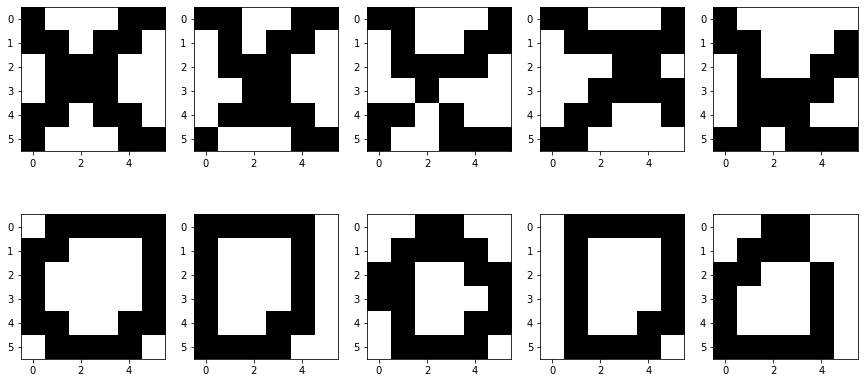

In [7]:
# Image examples
fig, ax = plt.subplots(2,5, figsize = (15,7))

for index_row in range(2):
    for index_col in range(5):
        if index_row == 0:
            ax[index_row, index_col].imshow(reshape(data_combined[(data_labels == "X")][index_col], (6,6)), cmap = "gray")
        elif index_row == 1:
            ax[index_row, index_col].imshow(reshape(data_combined[(data_labels == "O")][index_col], (6,6)), cmap = "gray")

### Averages over X and O images

Average over X-images:
 tf.Tensor(
[[0.07 0.57 1.   0.97 0.53 0.1 ]
 [0.53 0.   0.5  0.47 0.17 0.47]
 [1.   0.4  0.2  0.17 0.47 0.9 ]
 [0.9  0.5  0.13 0.1  0.47 0.87]
 [0.6  0.1  0.57 0.5  0.27 0.53]
 [0.   0.5  1.   0.87 0.57 0.2 ]], shape=(6, 6), dtype=float64)

Average over O-images:
 tf.Tensor(
[[0.83 0.27 0.   0.03 0.5  0.83]
 [0.43 0.17 0.73 0.5  0.2  0.5 ]
 [0.17 0.57 1.   1.   0.53 0.17]
 [0.1  0.67 1.   1.   0.7  0.13]
 [0.3  0.2  0.83 0.9  0.1  0.27]
 [0.83 0.17 0.   0.   0.1  0.97]], shape=(6, 6), dtype=float64)


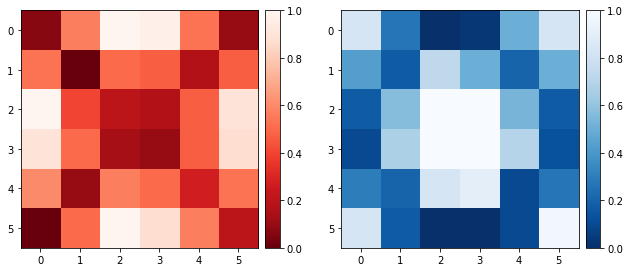

In [8]:
### Calculation of average images
mean_X = reshape(np.round(np.mean(data_combined[(data_labels == "X")], axis = 0), 2), (6,6))
mean_O = reshape(np.round(np.mean(data_combined[(data_labels == "O")], axis = 0), 2), (6,6))

### Print values of average images
print("Average over X-images:\n",mean_X)
print("\nAverage over O-images:\n",mean_O)

### Print average images
plot_data = [mean_X, mean_O]
colors = ["Reds_r", "Blues_r"]
fig, ax = plt.subplots(1,2, figsize = (10,5))

# Add space between both plots
plt.subplots_adjust(wspace=0.35)

for i in range(2):
    im = ax[i].imshow(plot_data[i], 
           vmin = 0, 
           vmax = 1,
           cmap = colors[i])

    # Positioning for the colorbar
    cax = fig.add_axes([ax[i].get_position().x1+0.01,
                        ax[i].get_position().y0,
                        0.02,
                        ax[i].get_position().height])
    
    plt.colorbar(im, ax=ax[i], cax=cax)

plt.show()

### Pixelwise Distance between average images

tf.Tensor(
[[-0.76  0.3   1.    0.94  0.03 -0.73]
 [ 0.1  -0.17 -0.23 -0.03 -0.03 -0.03]
 [ 0.83 -0.17 -0.8  -0.83 -0.06  0.73]
 [ 0.8  -0.17 -0.87 -0.9  -0.23  0.74]
 [ 0.3  -0.1  -0.26 -0.4   0.17  0.26]
 [-0.83  0.33  1.    0.87  0.47 -0.77]], shape=(6, 6), dtype=float64)


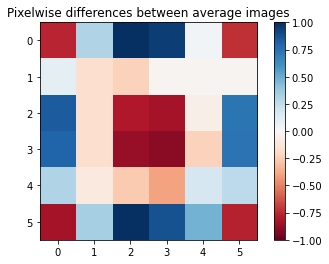

In [11]:
pixelwise_differences_nonabs = mean_X - mean_O

print(pixelwise_differences_nonabs)

plt.imshow(pixelwise_differences_nonabs, cmap='RdBu',
           vmin = -1,
           vmax = 1)
plt.title("Pixelwise differences between average images")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

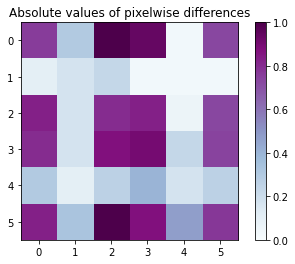

In [12]:
# Absolut distances
pixelwise_differences_abs = np.abs(pixelwise_differences_nonabs)

plt.imshow(pixelwise_differences_abs,
           vmin = 0,
           vmax = 1, 
           cmap = "BuPu",)

plt.title("Absolute values of pixelwise differences")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

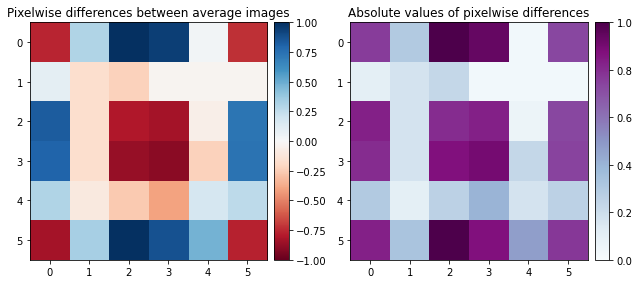

In [95]:
### Print average images
plot_data = [pixelwise_differences_nonabs, pixelwise_differences_abs]
colors = ["Reds_r", "Blues_r"]
fig, ax = plt.subplots(1,2, figsize = (10,5))

# Add space between both plots
plt.subplots_adjust(wspace=0.35)


im = ax[0].imshow(plot_data[0], 
       vmin = -1, 
       vmax = 1,
       cmap = "RdBu")

# Positioning for the colorbar
cax = fig.add_axes([ax[0].get_position().x1+0.01,
                    ax[0].get_position().y0,
                    0.02,
                    ax[0].get_position().height])

plt.colorbar(im, ax=ax[0], cax=cax)


im = ax[1].imshow(plot_data[1], 
       vmin = 0, 
       vmax = 1,
       cmap = "BuPu")

# Positioning for the colorbar
cax = fig.add_axes([ax[1].get_position().x1+0.01,
                    ax[1].get_position().y0,
                    0.02,
                    ax[1].get_position().height])

plt.colorbar(im, ax=ax[1], cax=cax)

ax[0].set_title("Pixelwise differences between average images")
ax[1].set_title("Absolute values of pixelwise differences")
plt.show()

In the following, we examine how the differences between pixels go along with their correlation. 

# One pixel and its correlations

Number of equal-valued pixels in each columns in comparison to the first pixel:
[60, 26, 7, 9, 30, 47, 32, 28, 32, 34, 36, 30, 12, 30, 49, 48, 31, 11, 13, 32, 51, 50, 34, 13, 26, 34, 33, 39, 26, 27, 50, 21, 7, 9, 17, 50]


Text(0, 0.5, 'frequency')

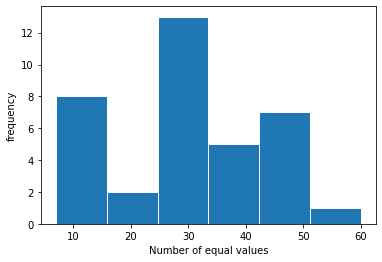

In [97]:
# For one pixel and its 50 values, we compare them to each other pixels and sum up the equal pixel value 
equal_values_p1 = []
for i in range(36):
    equal_values_p1.append(np.sum(data_combined[:,0] == data_combined[:,i]))
    
print("Number of equal-valued pixels in each columns in comparison to the first pixel:")
print(equal_values_p1)

plt.hist(equal_values_p1, bins = 6, edgecolor = "white")
plt.title("Histogram of equal values in comparison to 1st pixel")
plt.xlabel("Number of equal values")
plt.ylabel("frequency")

In [15]:
# Standardize the sum-values
standardized_values_p1 = (equal_values_p1 - np.mean(equal_values_p1))/np.std(equal_values_p1)
print(standardized_values_p1)

[ 2.11118423 -0.29038594 -1.63243985 -1.49117102 -0.00784827  1.19293681
  0.13342056 -0.1491171   0.13342056  0.2746894   0.41595823 -0.00784827
 -1.27926777 -0.00784827  1.33420565  1.26357123  0.06278615 -1.34990219
 -1.20863335  0.13342056  1.47547448  1.40484007  0.2746894  -1.20863335
 -0.29038594  0.2746894   0.20405498  0.62786148 -0.29038594 -0.21975152
  1.40484007 -0.64355802 -1.63243985 -1.49117102 -0.92609569  1.40484007]


In [20]:
low_difference_pixels = np.abs(standardized_values_p1) < 1
high_difference_pixels = np.abs(standardized_values_p1) >= 1

In [21]:
# Correlation between the 1st pixel to the others with a lot equal or unequal values
print("Mean: ", np.mean(corr_matrix[0, high_difference_pixels]))
print("SD: ", np.std(corr_matrix[0, high_difference_pixels]))
corr_matrix[0, high_difference_pixels]

Mean:  0.6850988808048907
SD:  0.10414792219164486


array([1.        , 0.77052899, 0.70352647, 0.56407607, 0.59458839,
       0.67016478, 0.62856487, 0.63122799, 0.56952143, 0.72338591,
       0.68350168, 0.56952143, 0.66254135, 0.77052899, 0.72338591,
       0.69651783])

In [22]:
# Correlation between the 1st pixel to the others with an average number of equal values 
print("Mean: ", np.mean(corr_matrix[0, low_difference_pixels]))
print("SD: ", np.std(corr_matrix[0, low_difference_pixels]))
corr_matrix[0, low_difference_pixels]

Mean:  0.15817594577722044
SD:  0.12961885135986279


array([0.15289416, 0.00335199, 0.06368779, 0.27272727, 0.09302108,
       0.13072756, 0.17748918, 0.00335199, 0.00335199, 0.03350126,
       0.0849412 , 0.15289416, 0.14478114, 0.08913118, 0.15352206,
       0.37283929, 0.25541126, 0.12309149, 0.35533453, 0.49746834])

### Correlation- and Distancematrix

Mean distance:  0.7001958526287733 
Standard deviation:  0.2689526003150445


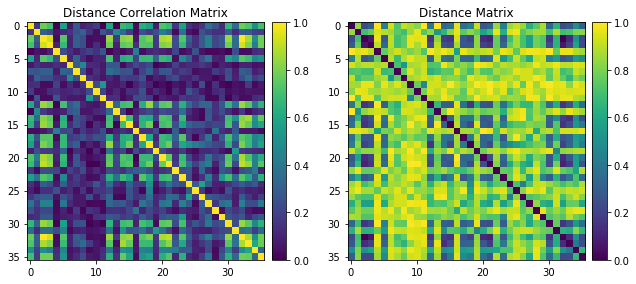

In [92]:
### Calculation of distance matrix
dist_matrix = 1- corr_matrix

print("Mean distance: ", np.mean(dist_matrix), "\nStandard deviation: ", np.std(dist_matrix))

### Plot correlation- and distance matrix 
plot_data = [corr_matrix, dist_matrix]
fig, ax = plt.subplots(1,2, figsize = (10,5))

# Add space between both plots
plt.subplots_adjust(wspace=0.35)

for i in range(2):
    im = ax[i].imshow(plot_data[i], 
           vmin = 0, 
           vmax = 1)

    # Positioning for the colorbar
    cax = fig.add_axes([ax[i].get_position().x1+0.01,
                        ax[i].get_position().y0,
                        0.02,
                        ax[i].get_position().height])
    
    plt.colorbar(im, ax=ax[i], cax=cax)

ax[0].set_title("Distance Correlation Matrix")
ax[1].set_title("Distance Matrix")
plt.show()

### Entries of low-distance pixels in the correlation matrix

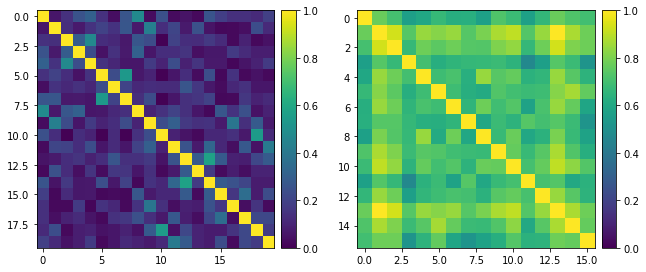

In [98]:
### Entries in correlation matrix belonging to low- and high-difference pixels
corr_matrix_low_diff_pixels = corr_matrix[:, low_difference_pixels]
corr_matrix_low_diff_pixels = corr_matrix_low_diff_pixels[low_difference_pixels, :]

corr_matrix_high_diff_pixels = corr_matrix[:, high_difference_pixels]
corr_matrix_high_diff_pixels = corr_matrix_high_diff_pixels[high_difference_pixels, :]

### Plot correlation- and distance matrix 
plot_data = [corr_matrix_low_diff_pixels, corr_matrix_high_diff_pixels]
fig, ax = plt.subplots(1,2, figsize = (10,5))

# Add space between both plots
plt.subplots_adjust(wspace=0.35)

for i in range(2):
    im = ax[i].imshow(plot_data[i], 
           vmin = 0, 
           vmax = 1)

    # Positioning for the colorbar
    cax = fig.add_axes([ax[i].get_position().x1+0.01,
                        ax[i].get_position().y0,
                        0.02,
                        ax[i].get_position().height])
    
    plt.colorbar(im, ax=ax[i], cax=cax)

ax[0].set_title("Correlation between low-difference pixels")
ax[1].set_title("Correlation between high-difference pixels")
plt.show()

# Analysis of Filtrationmatrices

Text(0.5, 1.0, 'Filtration matrices of O-images')

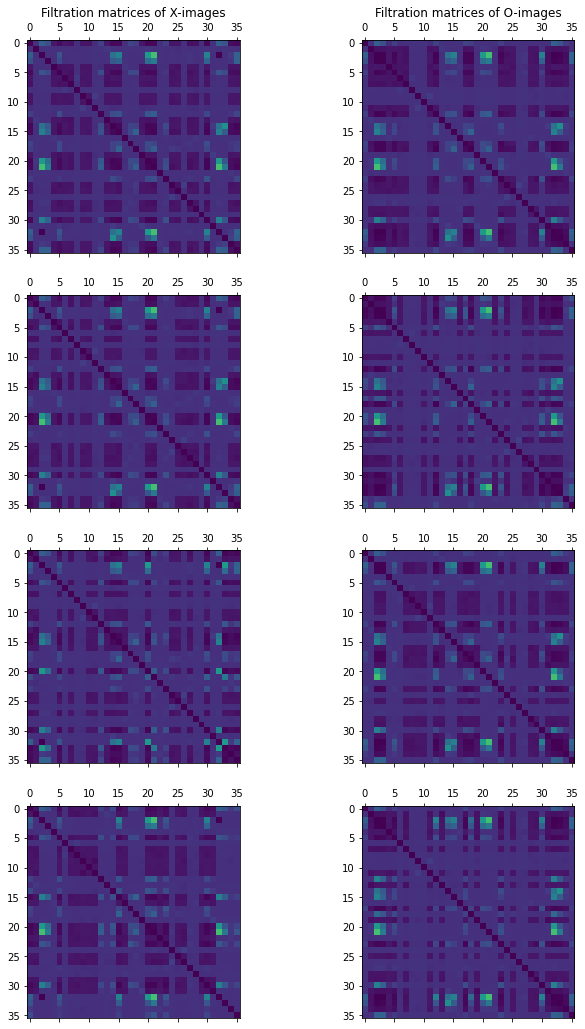

In [30]:
### Extract total maximum filtration value
max_filtration_value = np.max(all_filtrations)

### Plot examples of filtrations from X- and O-images
fig, ax = plt.subplots(4,2, figsize=(11, 18))

# Filtration matrices of X-images
ax[0,0].matshow(all_filtrations[0], vmin = 0, vmax = max_filtration_value)
ax[1,0].matshow(all_filtrations[1], vmin = 0, vmax = max_filtration_value)
ax[2,0].matshow(all_filtrations[2], vmin = 0, vmax = max_filtration_value)
ax[3,0].matshow(all_filtrations[3], vmin = 0, vmax = max_filtration_value)

ax[0,0].set_title("Filtration matrices of X-images")

# Filtration matrices of O-images
ax[0,1].matshow(all_filtrations[30], vmin = 0, vmax = max_filtration_value)
ax[1,1].matshow(all_filtrations[31], vmin = 0, vmax = max_filtration_value)
ax[2,1].matshow(all_filtrations[32], vmin = 0, vmax = max_filtration_value)
ax[3,1].matshow(all_filtrations[33], vmin = 0, vmax = max_filtration_value)

ax[0,1].set_title("Filtration matrices of O-images")

### Average Filtrations of X and O images

Text(0.5, 1.0, 'Average O Filtrations')

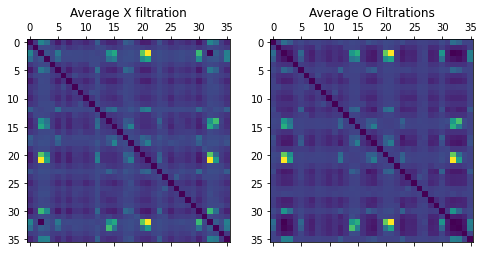

In [31]:
mean_X_filtration = np.mean(all_filtrations[0:30], axis = 0)
mean_O_filtration = np.mean(all_filtrations[31:60], axis = 0)

fig, ax = plt.subplots(1,2, figsize=(8, 13))

# Correlation matrices of X-images
ax[0].matshow(mean_X_filtration)
ax[0].set_title("Average X filtration")

ax[1].matshow(mean_O_filtration)
ax[1].set_title("Average O Filtrations")

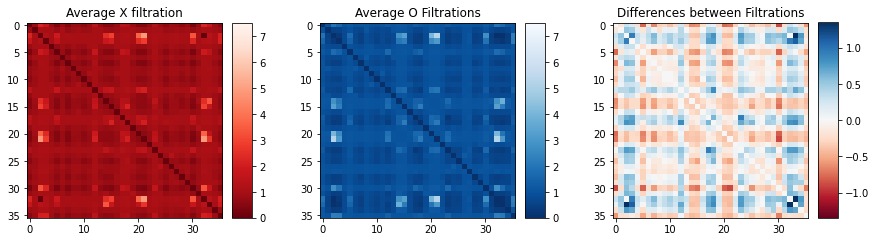

In [34]:
diff_filtration = mean_X_filtration - mean_O_filtration
max_diff_filtration = np.max(np.abs(diff_filtration))

### Print average images
plot_data = [mean_X_filtration, mean_O_filtration, diff_filtration]
colors = ["Reds_r", "Blues_r", "RdBu"]
fig, ax = plt.subplots(1,3, figsize = (14,20))

# Add space between both plots
plt.subplots_adjust(wspace=0.5)

for i in range(3):
    if(i<2):
        vmin_ = 0
        vmax_ = max_filtration_value
    else:
        vmin_ = -max_diff_filtration
        vmax_ = max_diff_filtration
        
    im = ax[i].imshow(plot_data[i], 
                      vmin = vmin_, 
                      vmax = vmax_,
                      cmap = colors[i])

    # Positioning for the colorbar
    cax = fig.add_axes([ax[i].get_position().x1+0.01,
                        ax[i].get_position().y0,
                        0.02,
                        ax[i].get_position().height])
    
    plt.colorbar(im, ax=ax[i], cax=cax)

ax[0].set_title("Average X filtration")
ax[1].set_title("Average O Filtrations")
ax[2].set_title("Differences between Filtrations")

plt.show()

### Plot graphs of filtration matrices

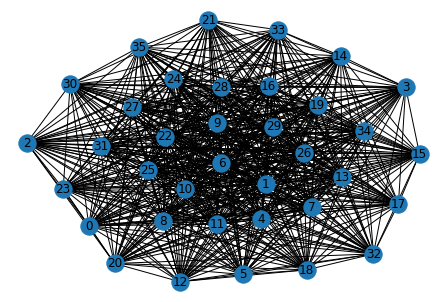

In [103]:
import networkx as nx
G = nx.from_numpy_matrix(dist_matrix)
nx.draw(G, with_labels=True)

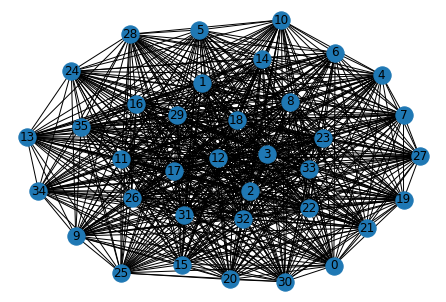

In [310]:
G = nx.from_numpy_matrix(all_filtrations[0])
nx.draw(G, with_labels=True)

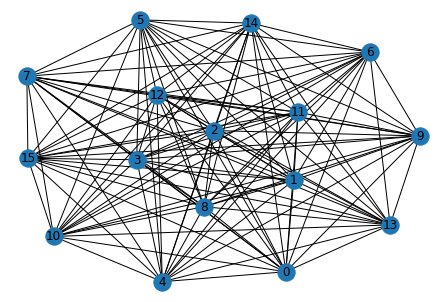

In [314]:
G = nx.from_numpy_matrix(all_filtrations[0][0:16, 0:16])
nx.draw(G, with_labels=True)

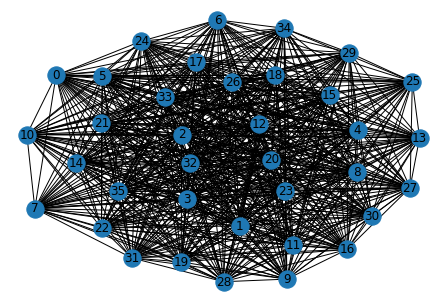

In [104]:
G = nx.from_numpy_matrix(mean_X_filtration)
nx.draw(G, with_labels=True)

# Decompose the filtration-formula

In [65]:
# Calculate decomposition

M = 1 - corr_matrix
M_sqr = np.square(M)
X_sqr = np.square(data_combined)

ncols = shape(corr_matrix)[1]
master_df = []

for index_subject in range(len(data_combined)):
    
    ### Calculate the filtration matrix
    t_sigma_subject = calc_t_sigma(sample_index = index_subject,
                                   M_sqr = M_sqr,
                                   X_sqr = X_sqr,
                                   M = M)
    
    
    ### Calculate X_ij matrix
    X_ij = np.zeros((ncols, ncols))
    
    for i in range(len(X_ij)):
        for j in range(len(X_ij)):
            X_ij[i,j] = 2*X_sqr[index_subject, i] + 2*X_sqr[index_subject, j]
            
    
    ### Calculate (X_i - X_j) / M_ij
    X_div_M = np.zeros((ncols, ncols))
    
    for i in range(len(X_div_M)):
        for j in range(len(X_ij)):
            if M[i,j] == 0:
                X_div_M[i,j] = 0
            else:
                X_div_M[i,j] = np.square((X_sqr[index_subject,i] - X_sqr[index_subject,j])/M[i,j])
        
        
    master_df.insert(index_subject, [t_sigma_subject, X_div_M, X_ij])

For each image we take a look on $t_{\sigma}$, $M_{i,j}^{2}$,  ($ \frac{X_{i}^{2} - X_{j}^{2}}{M_{i,j}})$, $2 \cdot X_{i}^{2} + 2 \cdot X_{j}^{2}$

### Plots for X images

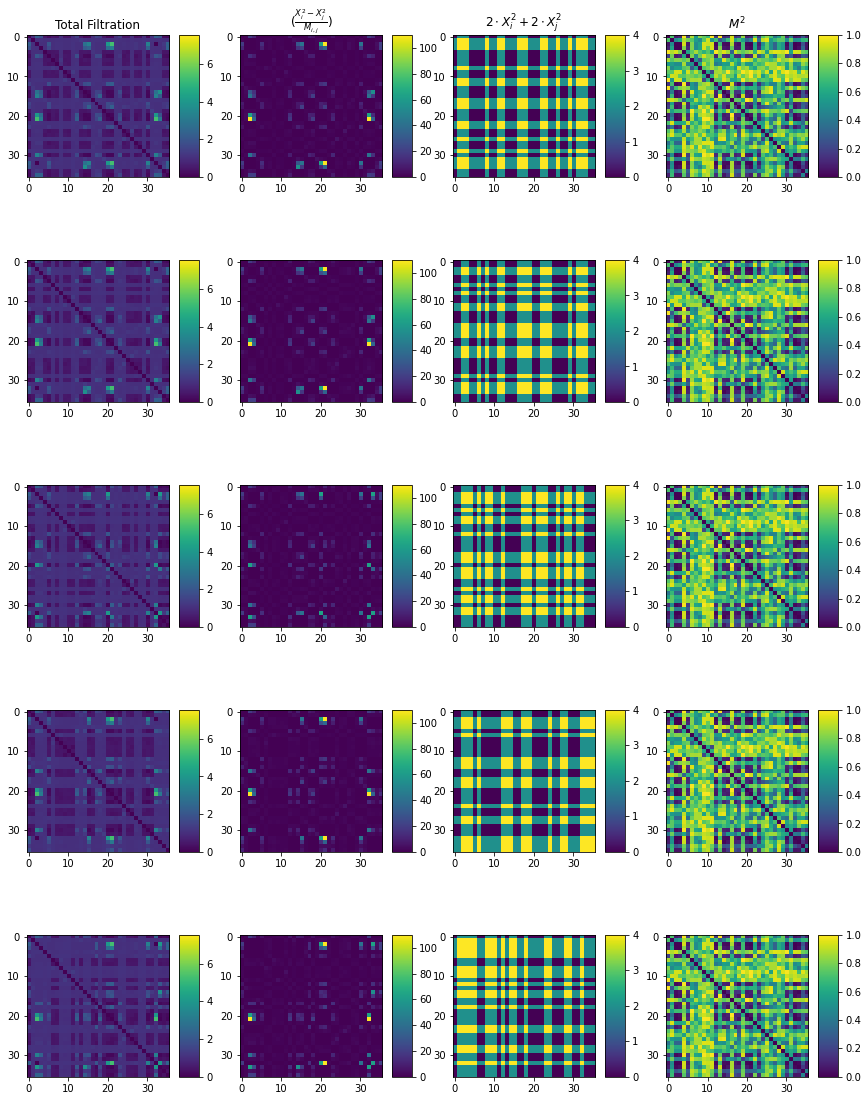

In [115]:
# (X Images)

fig, ax = plt.subplots(5,4, figsize = (14,20))

# Add space between both plots
plt.subplots_adjust(wspace=0.5)

# Filtration, M_sqr, 
for i in range(5):
        
    # Filtrationmatrix
    im0 = ax[i, 0].imshow(master_df[i][0], 
                      vmin = 0, 
                      vmax = max_filtration_value
                   )
    
    # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 0].get_position().x1+0.01,
                        ax[i, 0].get_position().y0,
                        0.02,
                        ax[i, 0].get_position().height])
    
    plt.colorbar(im0, ax=ax[i, 0], cax=cax)
    
    # X_div_M
    im1 = ax[i, 1].imshow(master_df[i][1], 
                    vmin = 0, 
                    vmax = 110,
                   )
    
        # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 1].get_position().x1+0.01,
                        ax[i, 1].get_position().y0,
                        0.02,
                        ax[i, 1].get_position().height])
    
    plt.colorbar(im1, ax=ax[i, 1], cax=cax)
        
    # X_ij
    im2 = ax[i, 2].imshow(master_df[i][2], 
                    vmin = 0, 
                    vmax = 4
                   )
    
        # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 2].get_position().x1+0.01,
                        ax[i, 2].get_position().y0,
                        0.02,
                        ax[i, 2].get_position().height])
    
    plt.colorbar(im2, ax=ax[i, 2], cax=cax)
    
    # M_sqr
    im3 = ax[i, 3].imshow(M_sqr, 
                    vmin = 0, 
                    vmax = 1
                   )
    
    # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 3].get_position().x1+0.01,
                        ax[i, 3].get_position().y0,
                        0.02,
                        ax[i, 3].get_position().height])
    
    plt.colorbar(im3, ax=ax[i, 3], cax=cax)

   
ax[0,0].set_title("Total Filtration")
ax[0,1].set_title(r"($ \frac{ X_{i}^{2} - X_{j}^{2} }{ M_{i,j }}^{2}$)")
ax[0,2].set_title(r"$2 \cdot X_{i}^{2} + 2 \cdot X_{j}^{2}$")
ax[0,3].set_title(r"$M^{2}$")

plt.show()

### Plots for O images

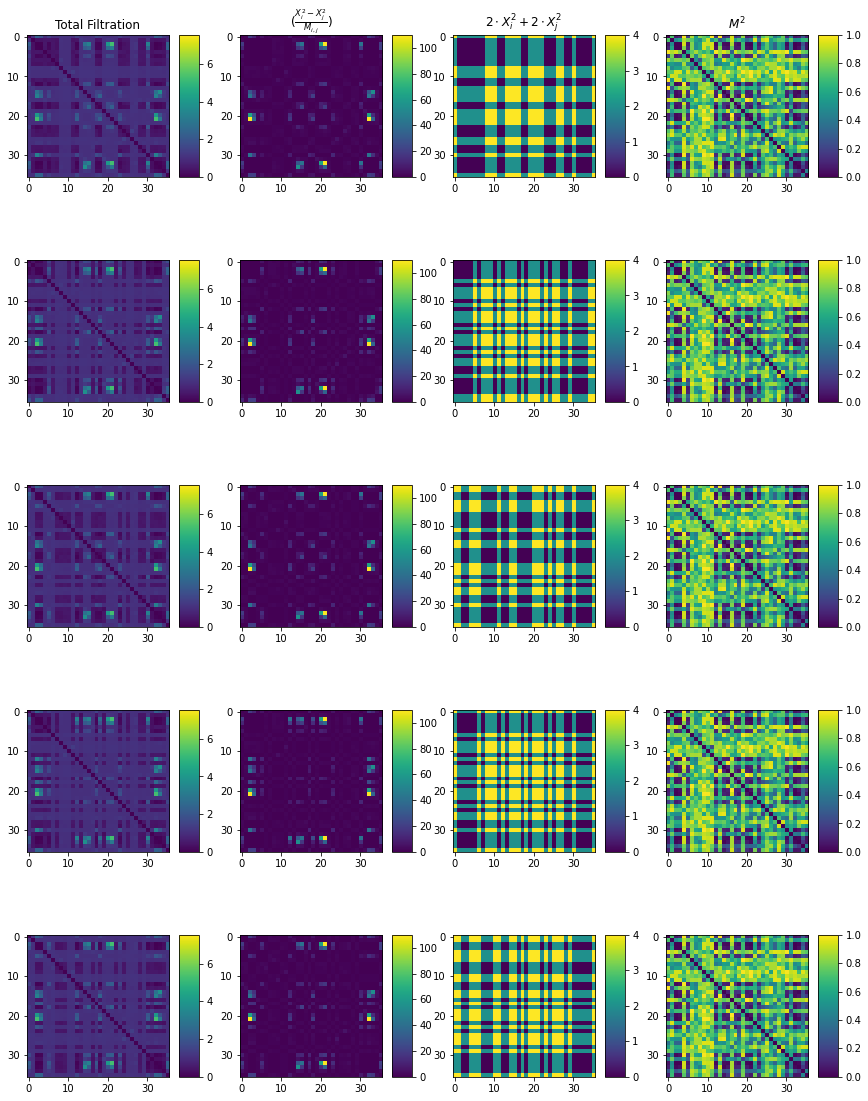

In [116]:
# (O Images)

fig, ax = plt.subplots(5,4, figsize = (14,20))

# Add space between both plots
plt.subplots_adjust(wspace=0.5)

# Filtration, M_sqr, 
for i in range(5):
        
    # Filtrationmatrix
    im0 = ax[i, 0].imshow(master_df[30 + i][0], 
                      vmin = 0, 
                      vmax = max_filtration_value
                   )
    
    # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 0].get_position().x1+0.01,
                        ax[i, 0].get_position().y0,
                        0.02,
                        ax[i, 0].get_position().height])
    
    plt.colorbar(im0, ax=ax[i, 0], cax=cax)
    
    # X_div_M
    im1 = ax[i, 1].imshow(master_df[30 + i][1], 
                    vmin = 0, 
                    vmax = 110,
                   )
    
        # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 1].get_position().x1+0.01,
                        ax[i, 1].get_position().y0,
                        0.02,
                        ax[i, 1].get_position().height])
    
    plt.colorbar(im1, ax=ax[i, 1], cax=cax)
        
    # X_ij
    im2 = ax[i, 2].imshow(master_df[30 + i][2], 
                    vmin = 0, 
                    vmax = 4
                   )
    
        # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 2].get_position().x1+0.01,
                        ax[i, 2].get_position().y0,
                        0.02,
                        ax[i, 2].get_position().height])
    
    plt.colorbar(im2, ax=ax[i, 2], cax=cax)
    
    # M_sqr
    im3 = ax[i, 3].imshow(M_sqr, 
                    vmin = 0, 
                    vmax = 1
                   )
    
    # Positioning for the colorbar
    cax = fig.add_axes([ax[i, 3].get_position().x1+0.01,
                        ax[i, 3].get_position().y0,
                        0.02,
                        ax[i, 3].get_position().height])
    
    plt.colorbar(im3, ax=ax[i, 3], cax=cax)

   
ax[0,0].set_title("Total Filtration")
ax[0,1].set_title(r"($ \frac{ X_{i}^{2} - X_{j}^{2} }{ M_{i,j }}^{2}$)")
ax[0,2].set_title(r"$2 \cdot X_{i}^{2} + 2 \cdot X_{j}^{2}$")
ax[0,3].set_title(r"$M^{2}$")

plt.show()